In [203]:
#-----------"Exploratory Analysis Zillow"---------------#
#Link :https://www.kaggle.com/philippsp/exploratory-analysis-zillow
#Module :14

In [ ]:
### Welcome and good luck to you all at Zillow's Home Value prediction!
#### with a price pool of 1.2 Million Dollar

#Here is a first exploratory analysis of the competition dataset.
#We are provided with a list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) 
#data in 2016.


#Zillow provides a "Zestimate", which is an estimated property value.
#Our task in this competition is to predict the the difference between the actual price and the estimate of the price (Zestimate). So, in fact we are predicting, where Zillow's Zestimate will be good, and where it will be bad.


In [1]:
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install mlxtend
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install ggplot

In [3]:
!conda install -c conda-forge --yes plotnine

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
from plotnine import *

In [222]:
from ggplot import *

In [211]:
import pandas as pd
import numpy as np
# import ggplot
from scipy import stats
from io import StringIO
import sklearn as sk
import itertools
import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from io import StringIO
from string import ascii_letters
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [212]:
# Properties
properties = pd.read_csv("C:/Users/praty/OneDrive/Documents/DS_PROJECT/Assignment2/properties_2016.csv")

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [213]:
# Transactions
transaction = pd.read_csv("C:/Users/praty/OneDrive/Documents/DS_PROJECT/Assignment2/train_2016_v2.csv")

In [214]:
# Sample Submission
sample_submission = pd.read_csv("C:/Users/praty/OneDrive/Documents/DS_PROJECT/Assignment2/sample_submission.csv")

In [215]:
# Renaming the features
data_dictionary_string = """key|old_key|description
aircon|airconditioningtypeid|Type of cooling system present in the home (if any)architectural_style
architecturalstyletypeid|architecturalstyletypeid|Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
area_base|finishedsquarefeet6|Base unfinished and finished area
area_firstfloor_finished|finishedfloor1squarefeet|Size of the finished living area on the first (entry) floor of the home
area_garage|garagetotalsqft|Total number of square feet of all garages on lot including an attached garage
area_live_finished|finishedsquarefeet12|Finished living area
area_liveperi_finished|finishedsquarefeet13|Perimeter living area
area_lot|lotsizesquarefeet|Area of the lot in square feet
area_patio|yardbuildingsqft17|Patio in yard
area_pool|poolsizesum|Total square footage of all pools on property
area_shed|yardbuildingsqft26|Storage shed/building in yard
area_total_calc|calculatedfinishedsquarefeet|Calculated total finished living area of the home
area_total_finished|finishedsquarefeet15|Total area
area_unknown|finishedsquarefeet50|Size of the finished living area on the first (entry) floor of the home
basementsqft|basementsqft|Finished living area below or partially below ground level
build_year|yearbuilt|The Year the principal residence was built
deck|decktypeid|Type of deck (if any) present on parcelfinishedfloor1squarefeet
flag_fireplace|fireplaceflag|Is a fireplace present in this home
flag_tub|hashottuborspa|Does the home have a hot tub or spa
framing|buildingclasstypeid|The building framing type (steel frame, wood frame, concrete/brick)
heating|heatingorsystemtypeid|Type of home heating system
id_fips|fips|Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details
id_parcel|parcelid|Unique identifier for parcels (lots)
id_zoning_raw|rawcensustractandblock|Census tract and block ID combined - also contains blockgroup assignment by extension
id_zoning|censustractandblock|Census tract and block ID combined - also contains blockgroup assignment by extension
latitude|latitude|Latitude of the middle of the parcel multiplied by 10e6
longitude|longitude|Longitude of the middle of the parcel multiplied by 10e6
material|typeconstructiontypeid|What type of construction material was used to construct the home
num_75_bath|threequarterbathnbr|Number of 3/4 bathrooms in house (shower + sink + toilet)
num_bathroom_calc|calculatedbathnbr|Number of bathrooms in home including fractional bathroom
num_bathroom|bathroomcnt|Number of bathrooms in home including fractional bathrooms
num_bath|fullbathcnt|Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
num_bedroom|bedroomcnt|Number of bedrooms in home
num_fireplace|fireplacecnt|Number of fireplaces in a home (if any)
num_garage|garagecarcnt|Total number of garages on the lot including an attached garage
num_pool|poolcnt|Number of pools on the lot (if any)
num_room|roomcnt|Total number of rooms in the principal residence
num_story|numberofstories|Number of stories or levels the home has
num_unit|unitcnt|Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
pooltypeid10|pooltypeid10|Spa or Hot Tub
pooltypeid2|pooltypeid2|Pool with Spa/Hot Tub
pooltypeid7|pooltypeid7|Pool without hot tub
quality|buildingqualitytypeid|Overall assessment of condition of the building from best (lowest) to worst (highest)
region_city|regionidcity|City in which the property is located (if any)
region_county|regionidcounty|County in which the property is located
region_neighbor|regionidneighborhood|Neighborhood in which the property is located
region_zip|regionidzip|Zip code in which the property is located
story|storytypeid|Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.
tax_building|structuretaxvaluedollarcnt|The assessed value of the built structure on the parcel
tax_delinquency_year|taxdelinquencyyear|Year for which the unpaid propert taxes were due
tax_delinquency|taxdelinquencyflag|Property taxes for this parcel are past due as of 2015
tax_land|landtaxvaluedollarcnt|The assessed value of the land area of the parcel
tax_property|taxamount|The total property tax assessed for that assessment year
tax_total|taxvaluedollarcnt|The total tax assessed value of the parcel
tax_year|assessmentyear|The year of the property tax assessmentbasementsqft
zoning_landuse_county|propertycountylandusecode|County land use code i.e. it's zoning at the county level
zoning_landuse|propertylandusetypeid|Type of land use the property is zoned for
zoning_property|propertyzoningdesc|Description of the allowed land uses (zoning) for that property
"""

data_dictionary_df = pd.read_csv(StringIO(data_dictionary_string), sep="|")
data_dictionary_df.sort_values(by="key", inplace=True)
#data_dictionary_df.index = data_dictionary_df["key"]
data_dictionary_df

,key,old_key,description
0,aircon,airconditioningtypeid,Type of cooling system present in the home (if...
1,architecturalstyletypeid,architecturalstyletypeid,"Architectural style of the home (i.e. ranch, c..."
2,area_base,finishedsquarefeet6,Base unfinished and finished area
3,area_firstfloor_finished,finishedfloor1squarefeet,Size of the finished living area on the first ...
4,area_garage,garagetotalsqft,Total number of square feet of all garages on ...
5,area_live_finished,finishedsquarefeet12,Finished living area
6,area_liveperi_finished,finishedsquarefeet13,Perimeter living area
7,area_lot,lotsizesquarefeet,Area of the lot in square feet
8,area_patio,yardbuildingsqft17,Patio in yard
9,area_pool,poolsizesum,Total square footage of all pools on property


In [216]:
data_dictionary = data_dictionary_df["description"]
data_dictionary.index = data_dictionary_df["key"]
data_dictionary["id_parcel"]

'Unique identifier for parcels (lots)'

In [217]:
# Remap properties with new keys from data_dictionary
data_dictionary_rename = data_dictionary_df["key"]
data_dictionary_rename.index  = data_dictionary_df["old_key"]
data_dictionary_rename.to_dict()

# Apply rename to properties
properties.rename(columns=data_dictionary_rename, inplace=True)
properties.index = properties['id_parcel']
properties.head()

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,...,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning
id_parcel,,,,,,,,,,,,,,,,,,,,,
10754147,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
10759547,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
10843547,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
10859147,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
10879947,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [218]:
#Transactions dates
transaction = transaction.rename(columns={
    "parcelid": "id_parcel",  
    "transactiondate": "date" 
})
transaction.sort_values(by="id_parcel", inplace=True)
transaction.index = transaction['id_parcel']
transaction.head()

,id_parcel,logerror,date
id_parcel,,,
10711738,10711738,0.0276,2016-08-02
10711755,10711755,-0.0182,2016-08-02
10711805,10711805,-0.1009,2016-05-03
10711816,10711816,-0.0121,2016-04-05
10711858,10711858,-0.0481,2016-07-15


TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'Line2D'

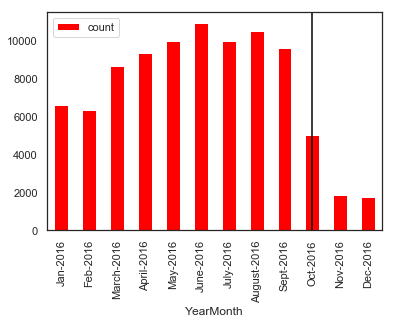

In [219]:
#Graph 1
# Distribution of transaction dates 
#As shown in the figure in RMD file, there are only some of the transactions after 25.10 in the train set, 
#because the rest is in the test set (for the public LB).

transaction["Year"] = pd.DatetimeIndex(transaction['date']).year
transaction["Month"] = pd.DatetimeIndex(transaction['date']).month
transaction["Year_Month"] = pd.DatetimeIndex(transaction['date']).year.astype(str) +"-"+ pd.DatetimeIndex(transaction['date']).month.astype(str)

df2 = pd.DataFrame({
    'YearMonth': ['Jan-2016', 'Feb-2016', 'March-2016', 'April-2016', 'May-2016', 'June-2016', 'July-2016','August-2016','Sept-2016','Oct-2016','Nov-2016','Dec-2016'],
    'Month': [1, 2, 3, 4, 5, 6,7,8,9,10,11,12],
    'sort_num' : [10,11,12,13,14,15,16,17,18,19,20,21]
}
)

Temp_Graph_1 = {'count': transaction.groupby(['Month']).size()}
data = pd.DataFrame(Temp_Graph_1) 

df = pd.merge(data, df2, on='Month')
df = pd.DataFrame(df)
df.plot.bar(x='YearMonth' , y='count' , color="red") + plt.axvline(x=9, c="black")

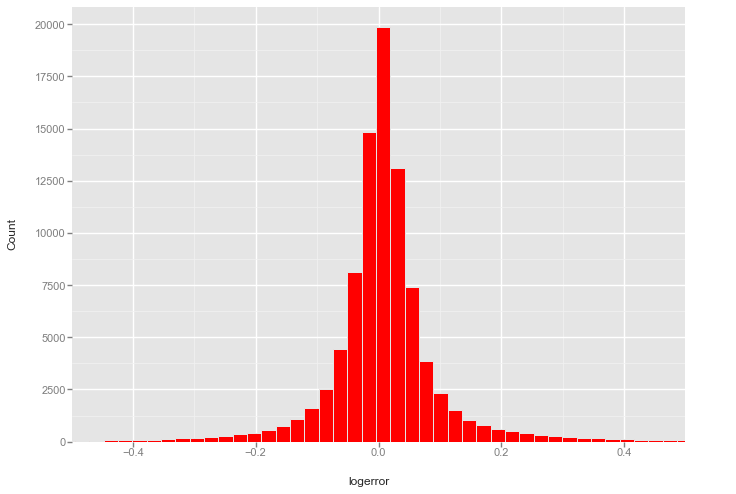

<ggplot: (-9223371936051936091)>


In [223]:
#Graph_2
#To get a feel for the data let's first have a look at the distribution of our outcome (logerror), i.e. the difference in log(Zestimate)-log(Saleprice)

Temp_Graph_2 = {'logerror': transaction['logerror']}
data = pd.DataFrame(Temp_Graph_2)
gg = ggplot(data, aes(x='logerror')) + geom_histogram(bins=400, fill="red") + xlim(-0.5, 0.5)+ ylab("Count")
print(gg)

In [ ]:
#In fact there are two outcomes you can look at:  

#  - logerror: log(Zestimate) - log(Saleprice). So a positive logerror means Zestimate is overestimating the Saleprice, a negative logerror means that Zestimate is underestimating Saleprice. 
#  - absolute logerror: a small value means that log(Zestimate) is close to log(Saleprice). So, Zestimate predictions are close to Saleprice.

#Any association with logerror would indicate that a feature would be associated with over- or understimating the sale price.
#Any association of a feature with absolute logerror would indicate that the feature is associated with a better or worse Zestimate.


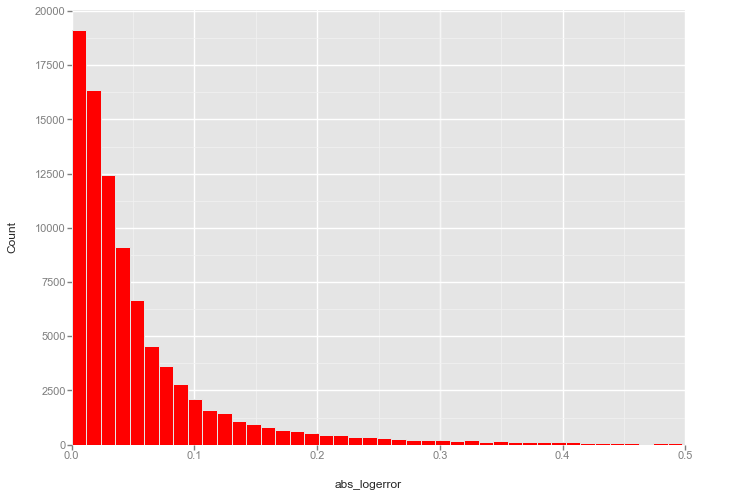

<ggplot: (-9223371936307246129)>


In [224]:
#Graph_3
# Absolute logerror
Temp_Graph_3 = {'abs_logerror': abs(transaction['logerror'])}
data = pd.DataFrame(Temp_Graph_3)

gg = ggplot(data, aes(x='abs_logerror')) + geom_histogram(bins=400, fill="red") + xlim(0, 0.5)+ ylab("Count")
print(gg)

In [225]:
from datetime import datetime

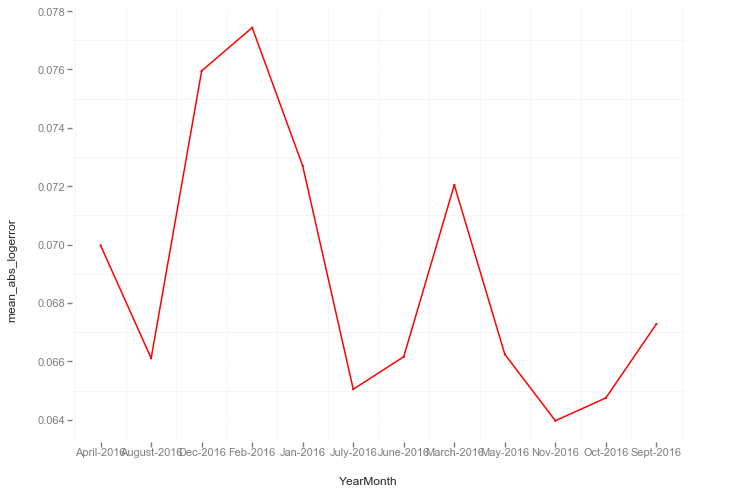

<ggplot: (-9223371936421753123)>


In [226]:
#Graph_4
#How does absolute log error change with time
transaction["abs_logerror"] = abs(transaction["logerror"])
Temp_Graph_4 = {'mean_abs_logerror': transaction.groupby(['Month'])['abs_logerror'].mean()}
data = pd.DataFrame(Temp_Graph_4)  #.sort_values(by ="Month" , ascending=True)
df4 = pd.merge(data, df2, on='Month')

gg = ggplot(df4, aes(x='YearMonth', y='mean_abs_logerror')) + geom_line(size=1.5, color="red") + geom_point(size=5, color="red") + theme_bw()
print(gg)

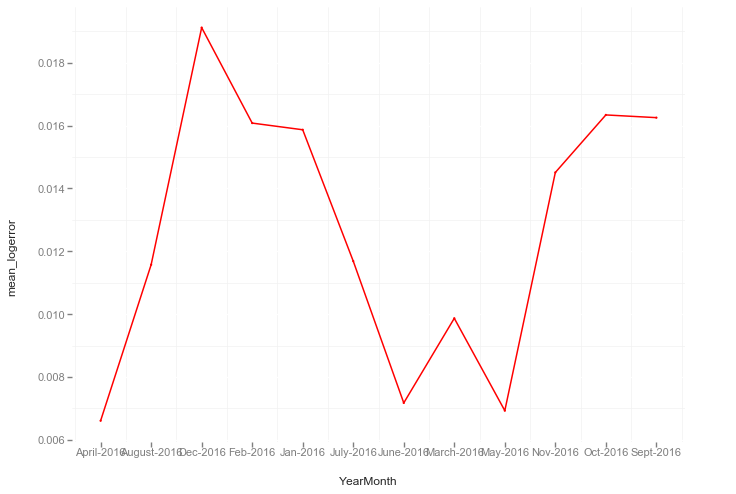

<ggplot: (-9223371936131345092)>


In [227]:
#Graph_5
#How does log error change with time
Temp_Graph_5 = {'mean_logerror': transaction.groupby(['Month'])['logerror'].mean()}
data = pd.DataFrame(Temp_Graph_5)  
df = pd.merge(data, df2, on='Month')
gg = ggplot(df, aes(x='YearMonth', y='mean_logerror')) + geom_line(size=1.5, color="red") + geom_point(size=5, color="red") + theme_bw()
print(gg)

<Figure size 1440x1440 with 0 Axes>

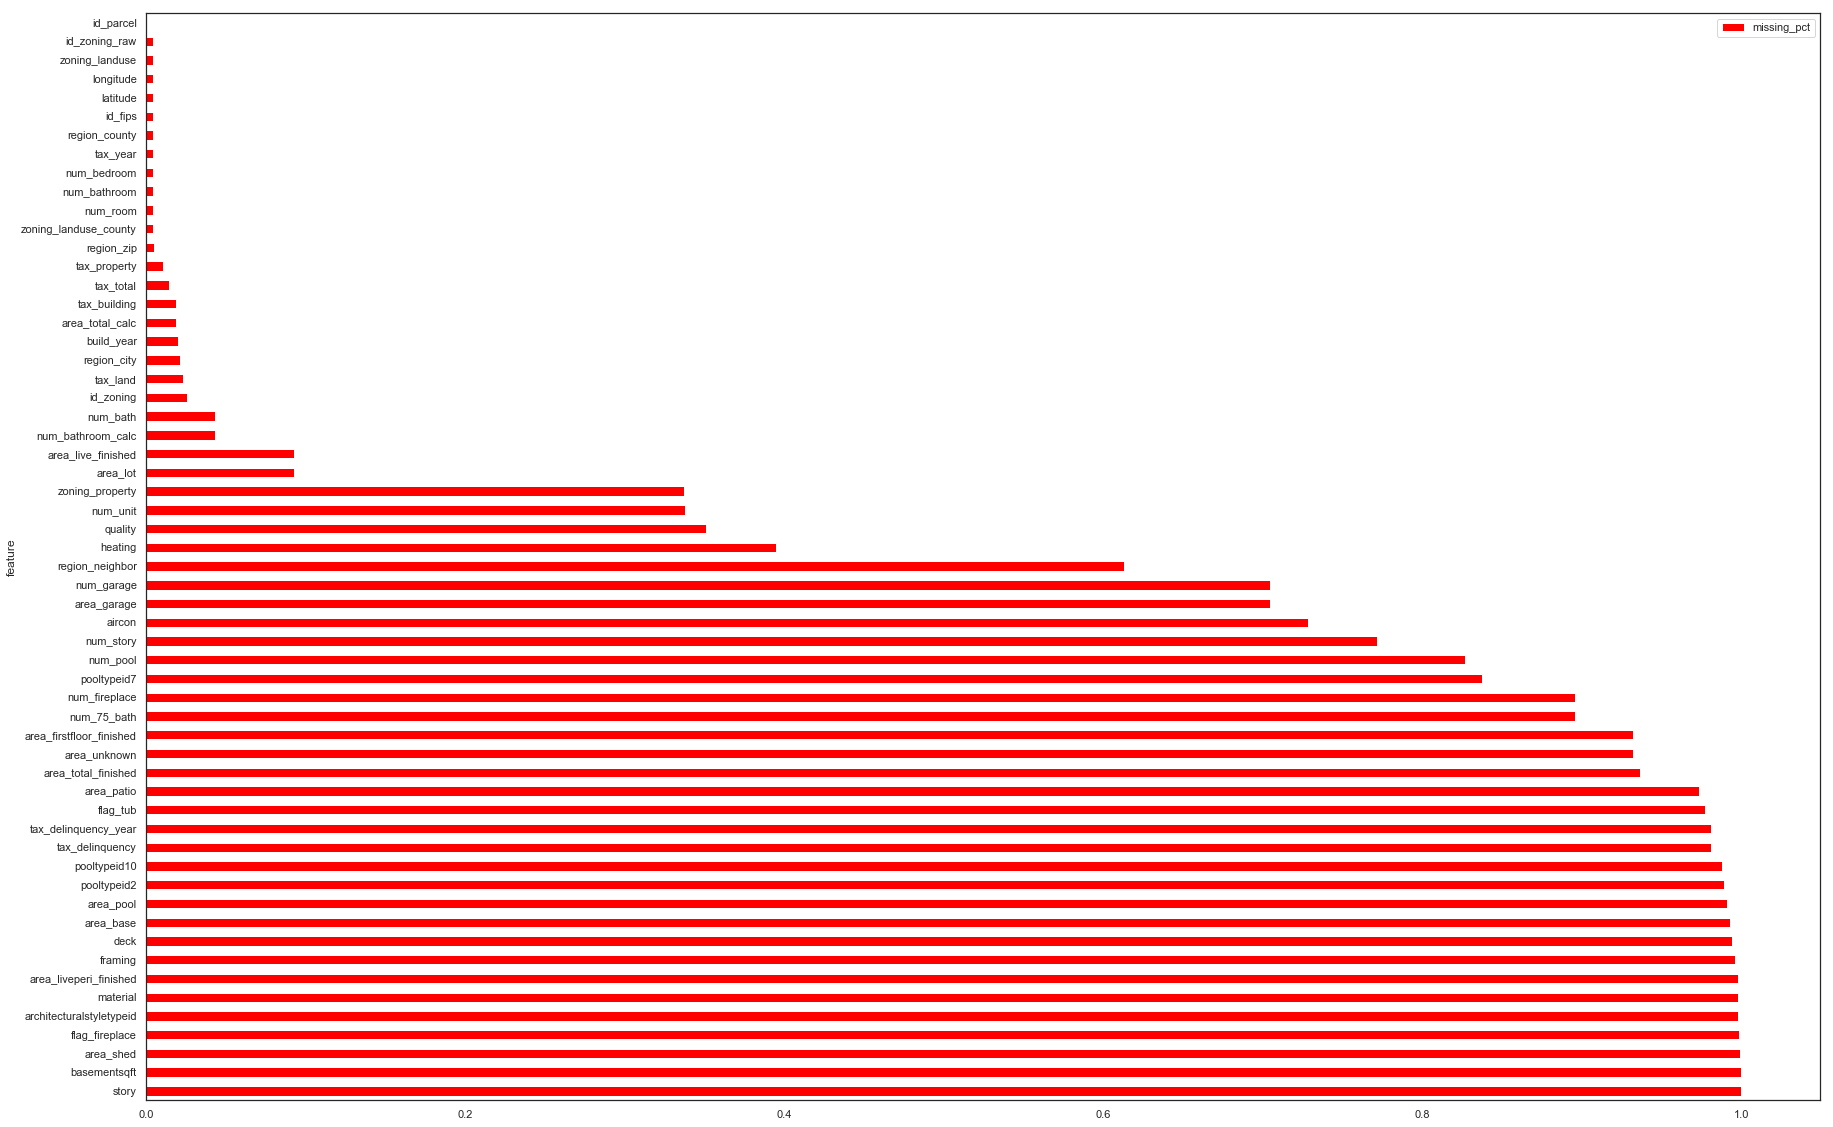

In [228]:
#Graph_6
### Missing values
#We have seen many missing values in the data peeking. 
#How many missing values are there for each feature?
#In fact, some features are missing nearly completely. So, we probably have to work more with the others.
plt.figure(figsize=(20,20))
Graph6 = {'feature' : [], 'missing_pct' : []}
List_Columns = list((pd.DataFrame(properties).columns.values))
for i in List_Columns:
    Graph6['feature'].append(i)
    Graph6['missing_pct'].append(properties[i].isna().sum()/len(properties[i]))

 
Temp_Graph_6 = pd.DataFrame(Graph6)
Temp_Graph_6 = Temp_Graph_6.sort_values(by ='missing_pct', ascending= False).reset_index(drop=True)

Temp_Graph_6.plot.barh(x='feature' , color="red" , figsize = (30, 20))+theme_bw()

In [229]:
data_dictionary = data_dictionary_df["description"]
data_dictionary.index = data_dictionary_df["key"]
data_dictionary["build_year"]

'The Year the principal residence was built'

In [230]:
data_dictionary_rename = data_dictionary_df["key"]
data_dictionary_rename.index  = data_dictionary_df["old_key"]
data_dictionary_rename.to_dict()

# Apply rename to properties
properties.rename(columns=data_dictionary_rename, inplace=True)
properties.index = properties['build_year']
properties.head()

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,...,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning
build_year,,,,,,,,,,,,,,,,,,,,,
NaN,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
NaN,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
NaN,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
1948.0,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
1947.0,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [231]:
properties = properties.rename(columns={
    "yearbuilt": "build_year",  
})
properties.index = properties['build_year']
properties.head()

,id_parcel,aircon,architecturalstyletypeid,basementsqft,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,...,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,id_zoning
build_year,,,,,,,,,,,,,,,,,,,,,
NaN,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
NaN,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
NaN,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
1948.0,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
1947.0,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



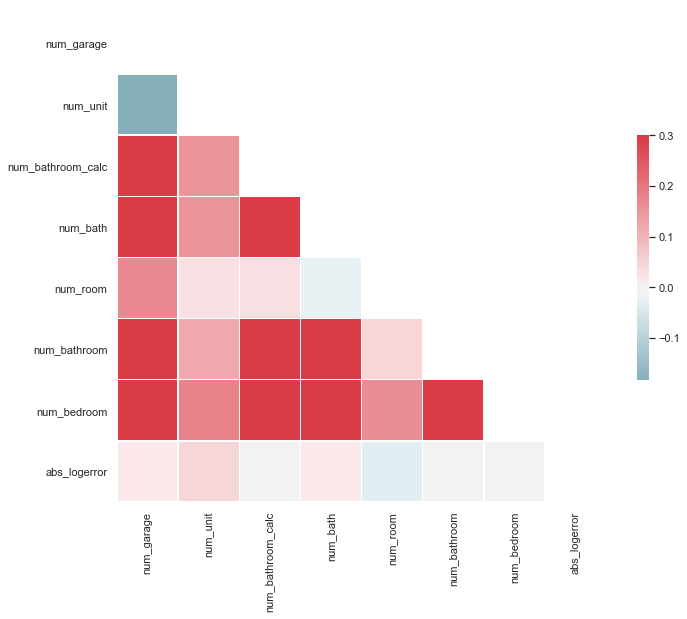

In [232]:
#Graph_7
# Correlation with absolute logerror
#num_ features:
Temp_Graph_7 = Temp_Graph_6.loc[Temp_Graph_6['missing_pct'] <0.75]
Temp_Graph_7 = Temp_Graph_7.loc[Temp_Graph_7['feature'].str.contains('num_', regex=True)]
transaction['abs_logerror'] = abs(transaction['logerror'])
Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )

col = []
for i in Temp_Graph_7['feature']:
    col.append(i)    
col.append('abs_logerror')

Results = Results.loc[:,col]
corr = Results.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



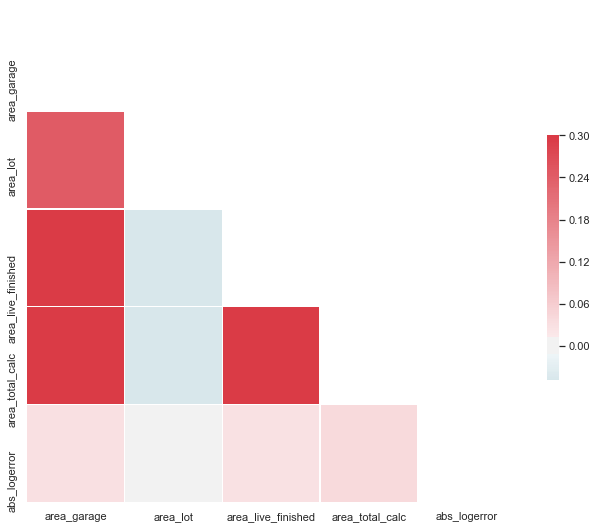

In [233]:
#Graph_8
# Correlation with absolute logerror
#area_ features
Temp_Graph_8 = Temp_Graph_6.loc[Temp_Graph_6['missing_pct'] <0.75]
Temp_Graph_8 = Temp_Graph_8.loc[Temp_Graph_8['feature'].str.contains('area_', regex=True)]
transaction['abs_logerror'] = abs(transaction['logerror'])

Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )

col = []
for i in Temp_Graph_8['feature']:
    col.append(i)    
col.append('abs_logerror')

Results = Results.loc[:,col]
corr = Results.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



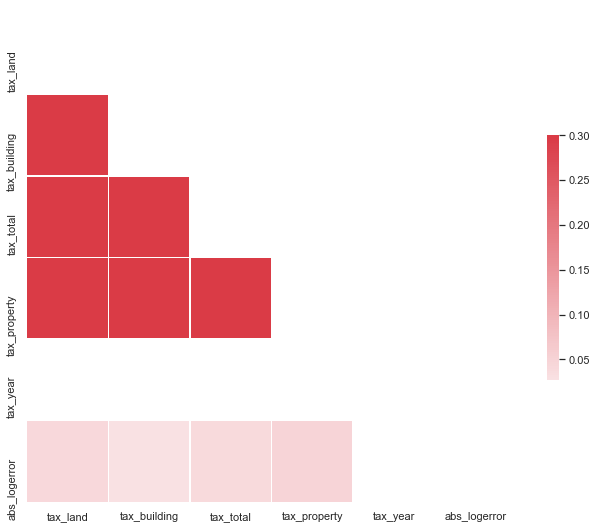

In [235]:
#Graph_9
# Correlation with absolute logerror
#tax_ features
Temp_Graph_9 = Temp_Graph_6.loc[Temp_Graph_6['missing_pct'] <0.75]
Temp_Graph_9 = Temp_Graph_9.loc[Temp_Graph_9['feature'].str.contains('tax_', regex=True)]
transaction['abs_logerror'] = abs(transaction['logerror'])

Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
Temp_Graph_9.drop(Temp_Graph_9.index[4] ,axis=0)
col = []
for i in Temp_Graph_9['feature']:
    col.append(i)    
col.append('abs_logerror')

Results = Results.loc[:,col]
corr = Results.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



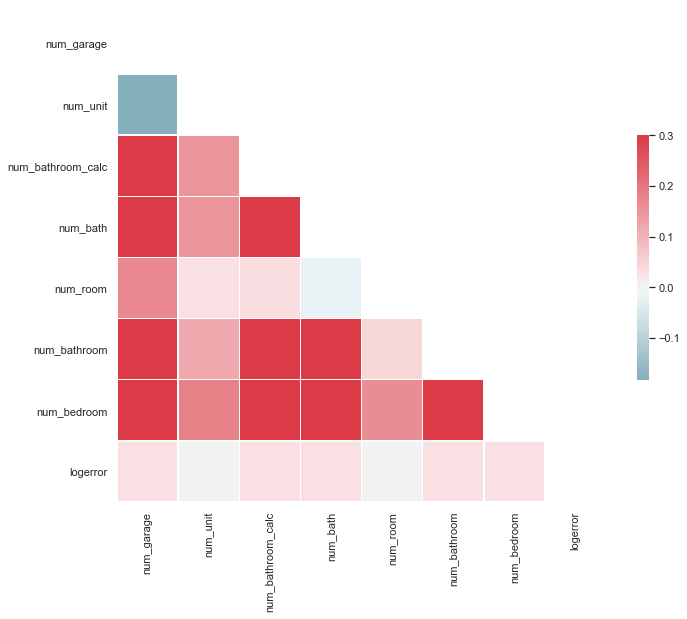

In [236]:
#Graph_10
#Correlation with logerror
#num_ features:
Temp_Graph_10 = Temp_Graph_6.loc[Temp_Graph_6['missing_pct'] <0.75]
Temp_Graph_10 = Temp_Graph_10.loc[Temp_Graph_10['feature'].str.contains('num_', regex=True)]
logerror = transaction['logerror']

Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )

col = []
for i in Temp_Graph_10['feature']:
    col.append(i)    
col.append('logerror')

Results = Results.loc[:,col]
corr = Results.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



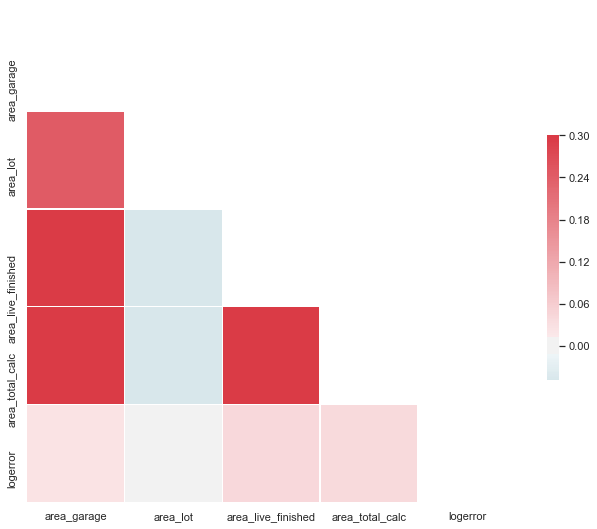

In [237]:
#Graph_11
# Correlation with logerror
#area_ features
Temp_Graph_11 = Temp_Graph_6.loc[Temp_Graph_6['missing_pct'] <0.75]
Temp_Graph_11 = Temp_Graph_11.loc[Temp_Graph_11['feature'].str.contains('area_', regex=True)]
logerror = transaction['logerror']

Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )

col = []
for i in Temp_Graph_11['feature']:
    col.append(i)    
col.append('logerror')

Results = Results.loc[:,col]
corr = Results.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



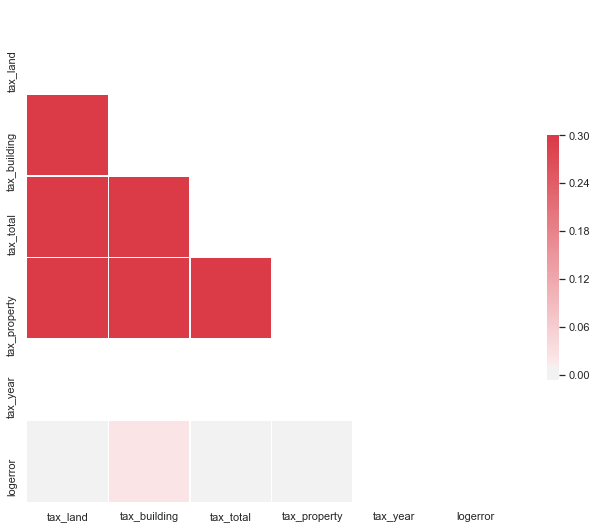

In [238]:
#Graph_12
# Correlation with logerror
#tax_ features
Temp_Graph_12 = Temp_Graph_6.loc[Temp_Graph_6['missing_pct'] <0.75]
Temp_Graph_12 = Temp_Graph_12.loc[Temp_Graph_12['feature'].str.contains('tax_', regex=True)]
logerror = transaction['logerror']

Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )

col = []
for i in Temp_Graph_12['feature']:
    col.append(i)    
col.append('logerror')

Results = Results.loc[:,col]
corr = Results.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



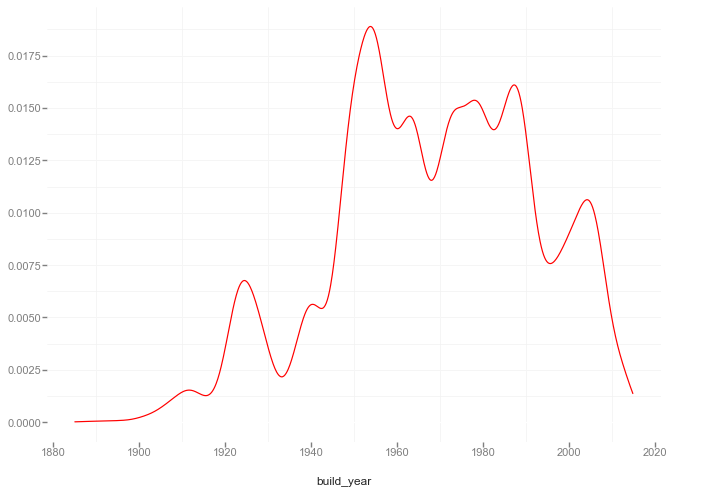

<ggplot: (100547664879)>


In [241]:
#Graph_13
# When were the houses built?
Temp_Graph_7 = Temp_Graph_6.loc[Temp_Graph_6['missing_pct'] <0.75]
Temp_Graph_7 = Temp_Graph_7.loc[Temp_Graph_7['feature'].str.contains('num_', regex=True)]
transaction['abs_logerror'] = abs(transaction['logerror'])
Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
Graph_13 = pd.DataFrame(Results)
gg = ggplot(Graph_13, aes('build_year')) + geom_density(color="red", size=1.2)+theme_bw()
print(gg)

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



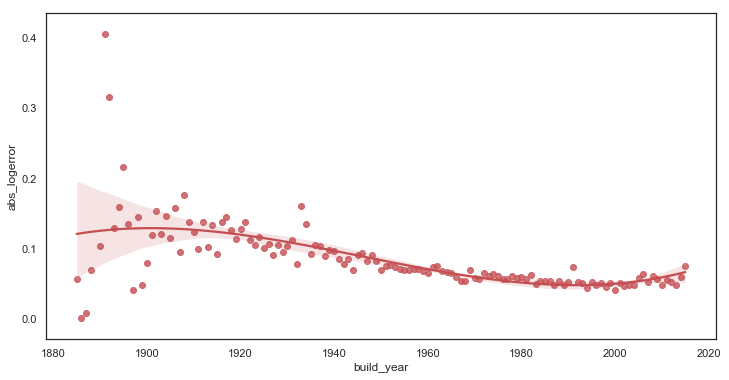

In [242]:
#Graph_14
# How does the absolute logerror change with build_year?
f, ax = plt.subplots(figsize=(12, 6))
df = Results.groupby('build_year', as_index = False)['abs_logerror'].mean()
sns.regplot(x="build_year", y="abs_logerror", data=df, scatter=True, order=3, truncate=True, color="r")

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



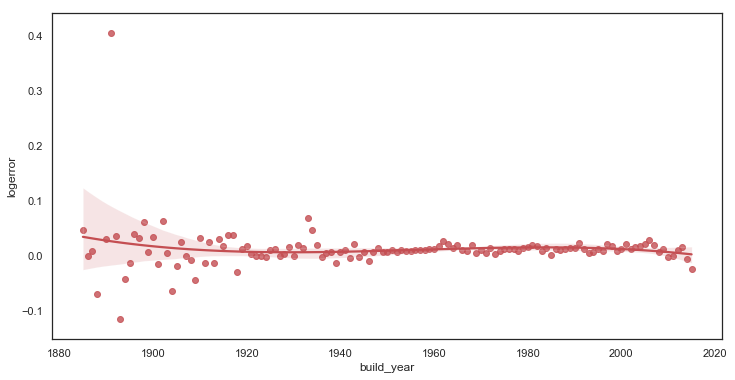

In [243]:
#Graph_15
# How does the logerror change with build_year?
f, ax = plt.subplots(figsize=(12, 6))
df = Results.groupby('build_year', as_index = False)['logerror'].mean()
sns.regplot(x="build_year", y="logerror", data=df, scatter=True, order=3, truncate=True, color = 'r')

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\DataScience\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



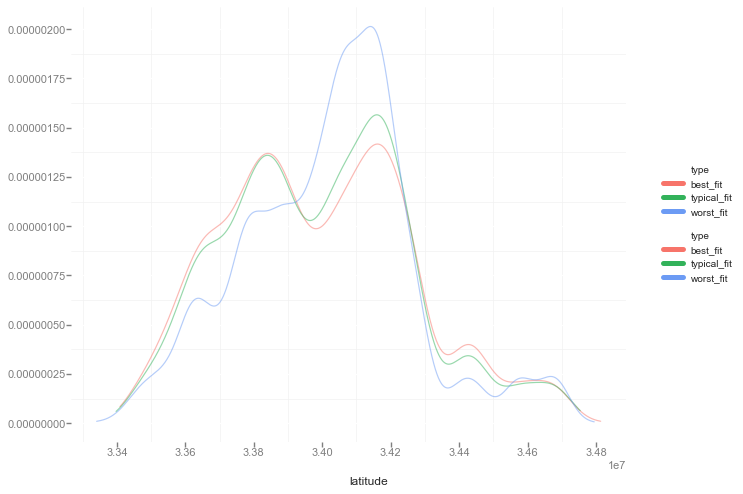

<ggplot: (-9223371936131351457)>


In [246]:
#Graph_16
# Where does Zestimate predict well?
#To get a quick feel where zestimate predicts well, we can group our absolute logerror into different percentiles, 
#e.g. the percentile with best predictions (top 10%), worst predictions (worst 10%) 
#and typical predictions (50% around the median).

def eq_mask(df, key, value):
    return df[df[key] == value]
transaction['percentile'] = pd.cut(transaction['abs_logerror'], np.quantile(transaction['abs_logerror'],(0, 0.1, 0.2, 0.25 ,0.5 ,0.75, 0.9, 1)),include_lowest=True,labels=False)
Results = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )

tmp1  = eq_mask(Results,'percentile', 1)
tmp1 = tmp1.sample(n=5000)
tmp1['type'] = "best_fit"
tmp2  = eq_mask(Results,'percentile', 5)
#tmp2 = tmp2.sample(n=5000)
tmp2['type'] = "worst_fit"
tmp3  = eq_mask(Results,'percentile', 3)
tmp3 = tmp3.sample(n=5000)
tmp3['type'] = "typical_fit"

#If the distributions of features are largely overlapping for these three groups of transactions 
#the feature most likely does not have a large effect on the goodness of estimation. 
#Let's see one example.

tmp = pd.DataFrame(pd.concat([tmp1,tmp2,tmp3]))
col_pal = "Blues"
gg = ggplot(tmp,aes(x='latitude',fill='type', color='type'))+geom_density(size=1.2,alpha=0.5) +theme_bw() #+ scale_fill_brewer(palette=col_pal)+scale_color_brewer(palette=col_pal)
print(gg)

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



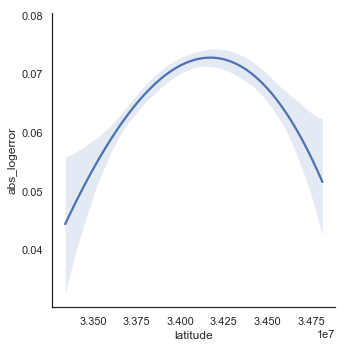

In [247]:
#Graph_17
#We can see that rows resulting in the worst predictions have a lower density for lower latitude values, 
#but a higher density for intermediate latitudes (around 34000000). 
tmptrans = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
data_17 = tmptrans[['latitude' , 'abs_logerror']]
lm=sns.lmplot(x='latitude',y='abs_logerror',data=data_17, scatter=False, order= 3,truncate= True, fit_reg=True)

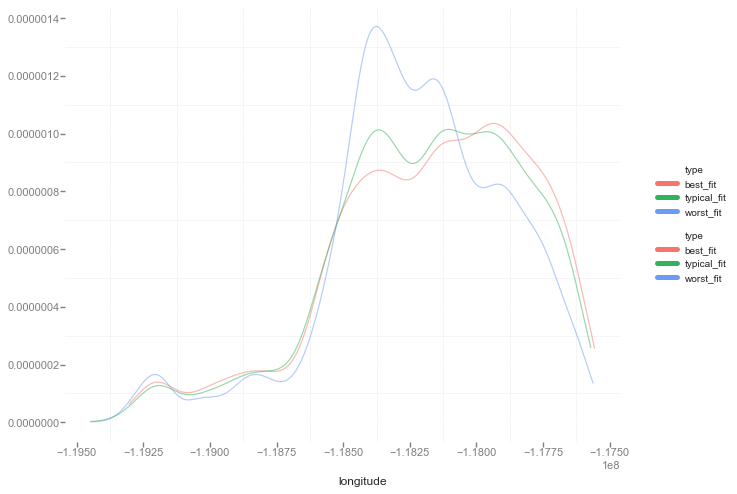

<ggplot: (-9223371936423433493)>


In [114]:
#Graph_18
col_pal = "Blues"
gg = ggplot(tmp,aes(x='longitude',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw() 
print(gg)

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



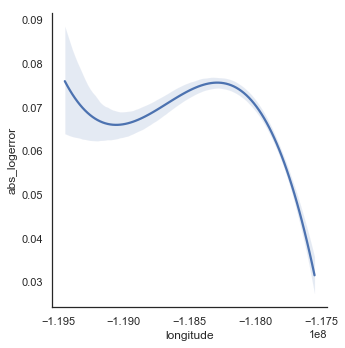

In [116]:
#Graph 19
tmptrans = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
data_18 = tmptrans[['longitude' , 'abs_logerror']]
lm=sns.lmplot(x='longitude',y='abs_logerror',data=data_18, scatter=False, order= 3,truncate= True, fit_reg=True)

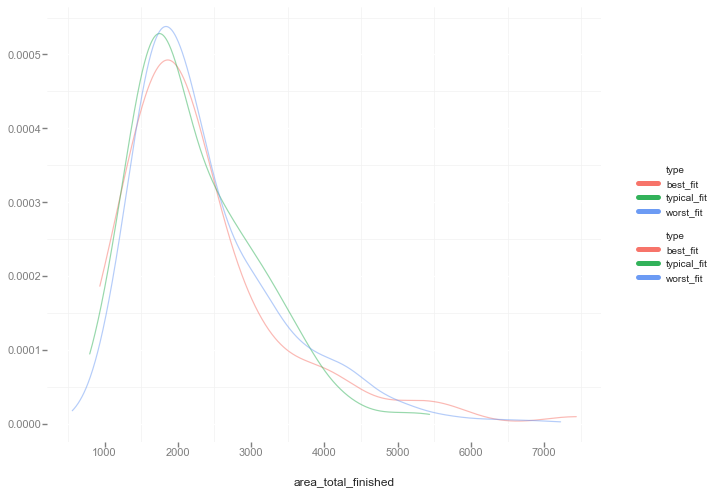

<ggplot: (100431082788)>


In [118]:
#Graph 20
col_pal = "Blues"
gg = ggplot(tmp,aes(x='area_total_finished',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw() 
print(gg)

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



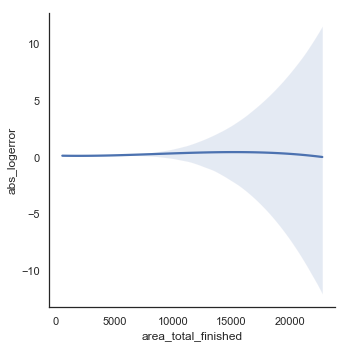

In [120]:
#graph 21
data_21 = tmptrans[['area_total_finished' , 'abs_logerror']]
lm=sns.lmplot(x='area_total_finished',y='abs_logerror',data=data_21, scatter=False, order= 3,truncate= True, fit_reg=True)

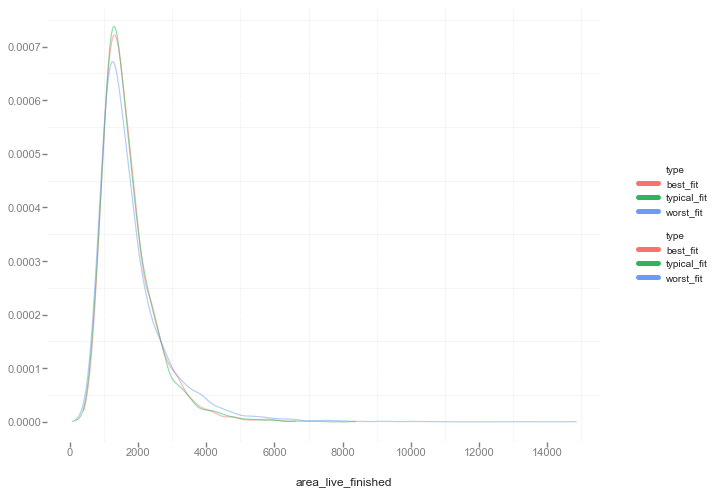

<ggplot: (-9223371936319590817)>


In [122]:
#Graph_22
col_pal = "Blues"
gg = ggplot(tmp,aes(x='area_live_finished',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw() 
print(gg)

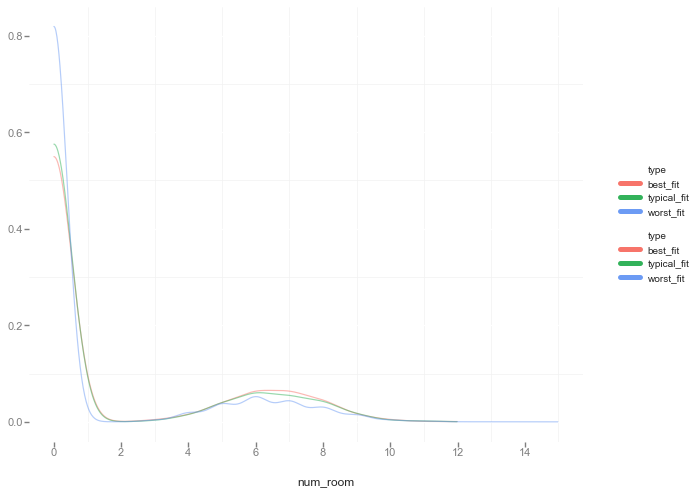

<ggplot: (-9223371936307633755)>


In [128]:
#Graph 23
col_pal = "Blues"
gg = ggplot(tmp,aes(x='num_room',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw() 
print(gg)


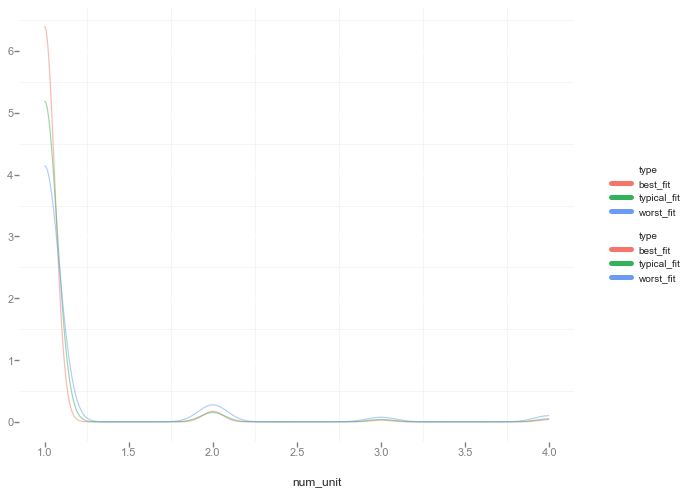

<ggplot: (100535017974)>


In [131]:
#Graph 24
col_pal = "Blues"
gg = ggplot(tmp,aes(x='num_unit',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw() 
print(gg)

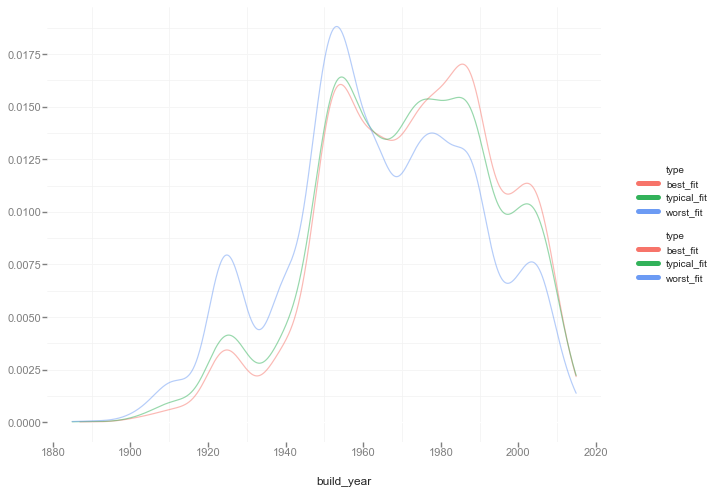

<ggplot: (100394956934)>


In [137]:
#Graph 25
col_pal = "Blues"
gg = ggplot(tmp,aes(x='build_year',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw()
print(gg)

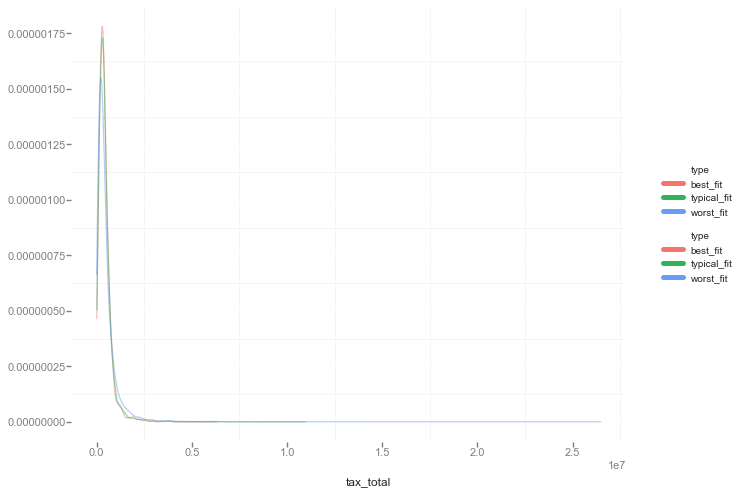

<ggplot: (-9223371936307657735)>


In [139]:
#Graph 26
col_pal = "Blues"
gg = ggplot(tmp,aes(x='tax_total',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw() 
print(gg)

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



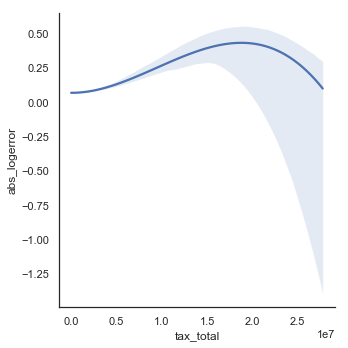

In [141]:
#Graph 27
data_27 = tmptrans[['tax_total' , 'abs_logerror']]
lm=sns.lmplot(x='tax_total',y='abs_logerror',data=data_27, scatter=False, order= 3,truncate= True, fit_reg=True)

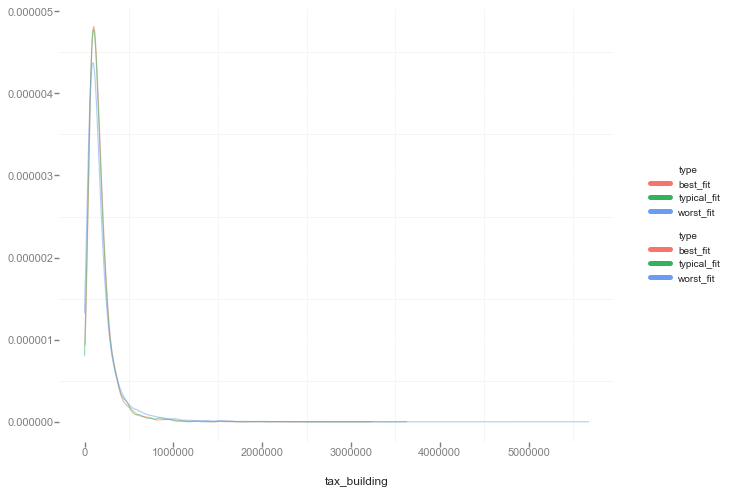

<ggplot: (-9223371936331483248)>


In [143]:
#Graph 28
col_pal = "Blues"
gg = ggplot(tmp,aes(x='tax_building',fill='type', color='type')) + geom_density(size=1.2,alpha=0.5) + theme_bw() 
print(gg)

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\DataScience\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\DataScience\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the f

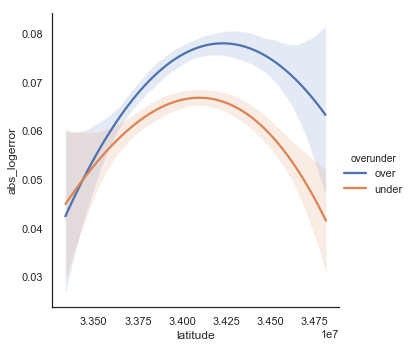

In [248]:
#Graph 29
# Where does Zestimate over or underpredict?
tmptrans = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
tmptrans['overunder'] = 'under'
tmptrans.ix[ (tmptrans.logerror > 0 ), ['overunder'] ] = 'over'
tmptrans.ix[ (tmptrans.logerror < 0 ), ['overunder'] ] = 'under'
col_pal = "red"
data_29 = tmptrans[['latitude' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='latitude',y='abs_logerror', hue='overunder', data=data_29, scatter=False, order= 3,truncate= True, fit_reg=True)

In [249]:
!pip install ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\DataScience\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\DataScience\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the fu

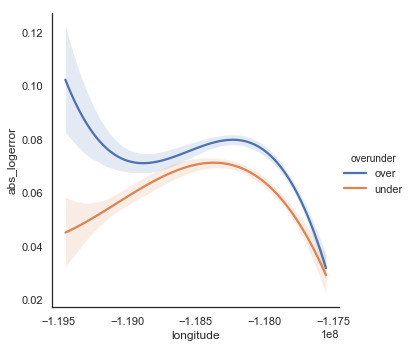

In [250]:
#Graph 30
tmptrans = pd.merge(transaction,
                   properties,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
tmptrans['overunder'] = 'under'
tmptrans.ix[ (tmptrans.logerror > 0 ), ['overunder'] ] = 'over'
tmptrans.ix[ (tmptrans.logerror < 0 ), ['overunder'] ] = 'under'
col_pal = "red"
data_30 = tmptrans[['longitude' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='longitude',y='abs_logerror' ,hue='overunder',data=data_30, scatter=False, order= 3,truncate= True, fit_reg=True)

In [251]:
#Graph_31(map1)
#Both for latitude and longitude there is a range where Zestimate both under- and overpredicts. 
#Where is that?

!pip install folium
import folium
m = folium.Map(
    width='100%', 
    height='100%',
    location=[33.8, -118.5],
    min_lat=-118.5, max_lat=33.8, min_lon=-118.25, max_lon=34.15,
    zoom_start=10,
)
folium.PolyLine([[-118.5,33.8],[-118.25,34.15]]).add_to(m)
folium.Rectangle([-118.5,33.8]).add_to(m)
m

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



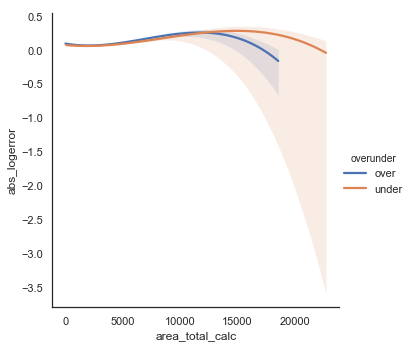

In [254]:
#Graph 32 
#For properties with small calculated total area, Zestimate seems to overpredict.
data_32 = tmptrans[['area_total_calc' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='area_total_calc',y='abs_logerror' ,hue='overunder',data=data_32, scatter=False, order= 3,truncate= True, fit_reg=True)


In [ ]:
#Whereas for actual finished area there is no such effect. 

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



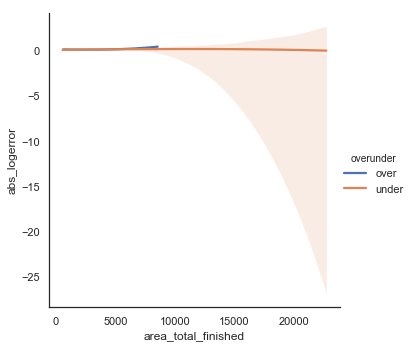

In [255]:
#Graph 33
data_33 = tmptrans[['area_total_finished' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='area_total_finished',y='abs_logerror' ,hue='overunder',data=data_33, scatter=False, order= 3,truncate= True, fit_reg=True)

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



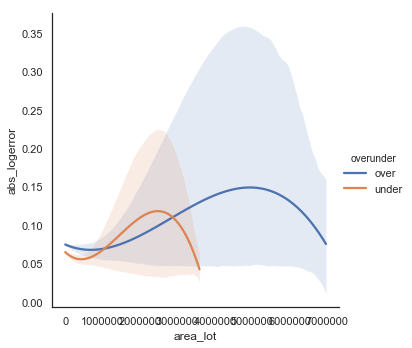

In [256]:
#Graph 34
data_34 = tmptrans[['area_lot' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='area_lot',y='abs_logerror' ,hue='overunder',data=data_34, scatter=False, order= 3,truncate= True, fit_reg=True)

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



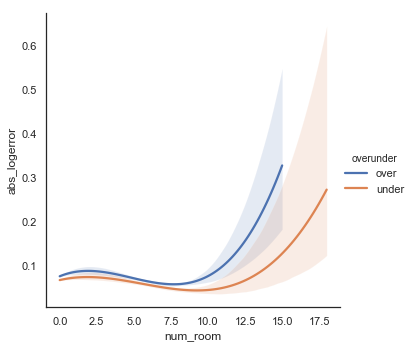

In [257]:
#Graph 35
data_35 = tmptrans[['num_room' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='num_room',y='abs_logerror' ,hue='overunder',data=data_35, scatter=False, order= 3,truncate= True, fit_reg=True)

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



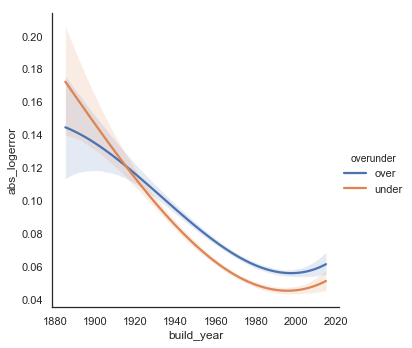

In [258]:
#Graph 36
data_36 = tmptrans[['build_year' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='build_year',y='abs_logerror' ,hue='overunder',data=data_36, scatter=False, order= 3,truncate= True, fit_reg=True)

C:\DataScience\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



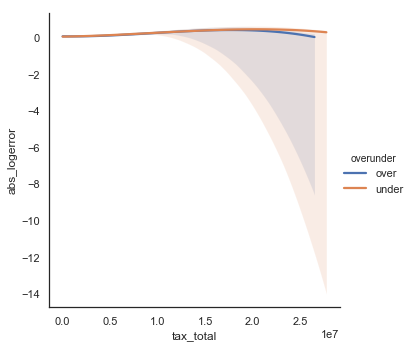

In [259]:
#Graph 37
data_37 = tmptrans[['tax_total' , 'abs_logerror', 'overunder']]
lm=sns.lmplot(x='tax_total',y='abs_logerror' ,hue='overunder',data=data_37, scatter=False, order= 3,truncate= True, fit_reg=True)

In [556]:
#Graph 38
#Where are all those properties?
properties_G38 = properties[['id_parcel','longitude','latitude']]
properties_G38 = properties_G38.sample(n=1000)
lat_Min = pd.DataFrame(properties_G38['latitude'] / 1e6).min()
lat_Max = pd.DataFrame(properties_G38['latitude'] / 1e6).max()
lon_Min = pd.DataFrame(properties_G38['longitude'] / 1e6).min()
lon_Max = pd.DataFrame(properties_G38['longitude'] / 1e6).max()

Data_38 = pd.merge(properties_G38,
                   transaction,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
Data_38['lat'] = Data_38['latitude'] / 1e6
Data_38['lon'] = Data_38['longitude'] / 1e6


m = folium.Map(
    width='100%', 
    height='100%',
    location=[34.29, -119.13],
    min_lat=lat_Min, max_lat=lat_Max, min_lon=lon_Min, max_lon=lon_Max,
    zoom_start=8,
)
folium.PolyLine([[-119.447353,33.340239],[-117.561077,34.799328]]).add_to(m)

Data_38.dropna()
Data_38.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lon"]]).add_to(m),axis=1)
m

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



In [508]:
#Graph 39
#Map absolute logerror
#Show the absolute logerror on map. Red = higher.
properties_G39 = properties[['id_parcel','longitude','latitude']]
properties_G39 = properties_G39.sample(n=800)

DataTemp_39 = pd.merge(properties_G39,
                   transaction,
                   left_on = 'id_parcel',
                   right_on = 'id_parcel',
                   how = 'left'
                  )
DataTemp_39.dropna(how="any")
DataTemp_39['lat'] = DataTemp_39['latitude'] / 1e6
DataTemp_39['lon'] = DataTemp_39['longitude'] / 1e6

Data_39 = DataTemp_39[['id_parcel','lat','lon','abs_logerror','percentile']]

Data_39['color'] = ""

Data_39.ix[ (Data_39.percentile ==1 ), ['color'] ] = '#ffffcc'
Data_39.ix[ (Data_39.percentile ==2 ), ['color'] ] = '#fed976'
Data_39.ix[ (Data_39.percentile ==3 ), ['color'] ] = '#feb24c'
Data_39.ix[ (Data_39.percentile ==4 ), ['color'] ] = '#fd8d3c'
Data_39.ix[ (Data_39.percentile ==5 ), ['color'] ] = '#fc4e2a'

m = folium.Map(
    width='100%', 
    height='100%',
    location=[34.29, -119.13],
    min_lat=lat_Min, max_lat=lat_Max, min_lon=lon_Min, max_lon=lon_Max,
    zoom_start=8,
)
folium.PolyLine([[-119.447353,33.340239],[-117.561077,34.799328]]).add_to(m)

Data_39.dropna(subset = ['lat'])
Data_39.dropna(subset = ['lon'])

Data_39.apply(lambda row:folium.CircleMarker(location=[row["lat"], 
                                                  row["lon"]], color= row["color"]).add_to(m),
         axis=1)
m

C:\DataScience\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning:

'id_parcel' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

C:\DataScience\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\DataScience\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

C:\DataScience\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
T